# Titanic Survival Analysis

## Description

This project aims to apply data manipulation, cleaning, analysis, and visualization techniques using Python and the Pandas library. Based on the historical dataset of the Titanic shipwreck (available on Kaggle), an exploratory analysis will be conducted to identify the factors that influenced passengers’ likelihood of survival.

---

The work includes:

- **Data preparation**: variable profiling, detection and handling of missing values, creation of derived variables, and encoding of categorical variables.  

- **Statistical analysis**: calculation of overall survival rates and segmented survival rates by variables such as class, gender, age, family size, and port of embarkation.  

- **Data visualization**: generation of charts to support the interpretation of patterns and trends.  

- **Evidence-based conclusions**: identification of the factors with the greatest impact on survival and relevant or unexpected findings.  

---

This project integrates key data science skills such as structured data manipulation, visual communication of results, and statistical interpretation, providing a practical case study based on a real historical event.a más lectores?

## Part 1. Data Loading and Profiling

In [1]:
# Import the libraries needed for the analysis

import numpy as np
import pandas as pd

In [2]:
# Define the path to the dataset we are going to use

path = "C:/Users/Samuel Cardona Ochoa/Documents/GitHub/titanic_survival_analysis/train.csv"

In [3]:
# Read the CSV file using pandas and display it to verify it was loaded correctly

df = pd.read_csv(path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Dataset Description – Titanic (train.csv)

The dataset contains demographic and travel information of Titanic passengers, along with their survival status after the shipwreck. Each row represents a passenger, and the included variables are:

* **PassengerId:** The identification number of each passenger. Integer variable.  

* **Survived:** Indicates whether the passenger survived (1) or did not survive (0). Integer variable.  

* **Pclass:** Passenger ticket class, reflecting socioeconomic status: 1 = First class, 2 = Second class, 3 = Third class. Integer variable.  

* **Name:** Passenger’s name. String variable.  

* **Sex:** Passenger’s gender (male or female). String variable.  

* **Age:** Passenger’s age in years. May contain missing values. Float variable.  

* **SibSp:** Number of siblings or spouses traveling with the passenger on the Titanic. Integer variable.  

* **Parch:** Number of parents or children traveling with the passenger on the Titanic. Integer variable.  

* **Ticket:** Ticket assigned to the passenger. String variable.  

* **Fare:** Fare paid by the passenger for the ticket. Float variable.  

* **Cabin:** Cabin number assigned to the passenger (can be empty in many cases). String variable.  

* **Embarked:** Port of embarkation: C = Cherbourg, Q = Queenstown, S = Souampton. String variable.  


In [4]:
# General summary of the DataFrame, including Non-Null counts and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Statistical summary of the variables included in the DataFrame

df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
# Count of missing values
print('COUNT OF MISSING VALUES')
print('-------------------------')
print(df.isnull().sum())

# Identification of duplicates
print('\nIDENTIFICATION OF DUPLICATES')
print('-------------------------')
print("Duplicates:", df.duplicated().sum())

# Unique values in the 'Sex' column
print('\nUNIQUE VALUES IN "Sex" COLUMN')
print('-------------------------')
print(df['Sex'].value_counts())

COUNT OF MISSING VALUES
-------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

IDENTIFICATION OF DUPLICATES
-------------------------
Duplicates: 0

UNIQUE VALUES IN "Sex" COLUMN
-------------------------
Sex
male      577
female    314
Name: count, dtype: int64


### Findings in Data Loading and Profiling

1. **Categorical Variables:** Variables such as gender and port of embarkation can be transformed into numerical values to perform analysis on these factors.  
2. **Missing Values:** The column *Cabin* contains 687 missing values, which may represent a problem if these records are removed. Following this, *Age* has 177 missing values. No missing values were found in *Sex* or *Survived*.  
3. **Initial Dataset Dimensions:** The dataset originally has 891 rows × 12 columns, including all records with missing values.  
4. **Initial Encoding Maps:** Below are the variables encoded in the original dataset.  

--------------------------------

| pclass | Socioeconomic Class |
|--------|----------------------|
| 1      | First Class          |
| 2      | Second Class         |
| 3      | Third Class          |

--------------------------------

| embarked | Port of Embarkation |
|----------|----------------------|
| C        | Cherbourg            |
| Q        | Queenstown           |
| S        | Southampton          |

## Parte 2. Limpieza de datos

In [7]:
# Due to the high number of missing values, we will drop the "Cabin" column to preserve as much data as possible

df_without_cabin = df.drop('Cabin', axis=1)
df_without_cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [8]:
# Now, without the "Cabin" column, we proceed to remove the records with missing values

df_without_nulls = df_without_cabin.dropna()
df_without_nulls

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [9]:
# Check that there are no missing values

print('COUNT OF MISSING VALUES')
print('-------------------------')
print(df_without_nulls.isnull().sum())

COUNT OF MISSING VALUES
-------------------------
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [10]:
# Double-checking that there are no duplicate records

print('\nIDENTIFICATION OF DUPLICATES')
print('-------------------------')
print("Duplicates:", df_without_nulls.duplicated().sum())


IDENTIFICATION OF DUPLICATES
-------------------------
Duplicates: 0


In [11]:
# Create a new column in the DataFrame to calculate the family size of each passenger (including the passenger themselves)

df_without_nulls = df_without_nulls.copy()
df_without_nulls["family_size"] = df_without_nulls["SibSp"] + df_without_nulls["Parch"] + 1
df_without_nulls

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,6
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


In [12]:
# Encode categorical variables into numerical values

df_without_nulls = df_without_nulls.copy()
df_without_nulls.loc[:, 'Sex'] = df_without_nulls['Sex'].replace({
    'male': 1,
    'female': 0
})

df_without_nulls

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,382652,29.1250,Q,6
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,S,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C,1


**Encoding map for the `Sex` variable:**

| Sex    | Code |
|--------|------|
| male   | 1    |
| female | 0    |

In [13]:
# Encode the 'Embarked' categorical variable into numerical values

df_without_nulls = df_without_nulls.copy()
df_without_nulls.loc[:, 'Embarked'] = df_without_nulls['Embarked'].replace({
    'C': 1,
    'Q': 2,
    'S': 3
})

df_without_nulls

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,3,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,3,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,3,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,382652,29.1250,2,6
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,3,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,3,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,1,1


**Encoding map for the `Embarked` variable:**

| Letter | Port of Embarkation | Code |
|--------|----------------------|------|
| C      | Cherbourg            | 1    |
| Q      | Queenstown           | 2    |
| S      | Southampton          | 3    |

### Data Cleaning Summary

* **Step 1:** The *Cabin* column was removed due to the large number of missing values, meaning that most records did not contain information about the passenger’s cabin.  

* **Step 2:** After dropping this column, records with missing values were removed to ensure the quality of the analysis.  

* **Step 3:** A new column, *family_size*, was added by summing the number of parents/children and siblings/spouses, plus one to include the passenger themselves. This feature will be useful in later calculations.  

* **Step 4:** The *Sex* variable was encoded, assigning `1` to males and `0` to females. This transformation will facilitate analysis.  

* **Step 5:** The *Embarked* variable was encoded as numerical values: `Cherbourg = 1`, `Queenstown = 2`, and `Southampton = 3`. This transformation also facilitates analysis.  

## Part 3. Statistical Analysis

In [14]:
# Overall survival rate

global_survival_rate = df_without_nulls['Survived'].sum() / len(df_without_nulls)

print(f"Overall survival rate: {global_survival_rate:.2%}")

Overall survival rate: 40.45%


In [15]:
# Survival rate by passenger class

survival_rate_by_class = (
    df_without_nulls.groupby('Pclass')['Survived'].sum() 
    / df_without_nulls.groupby('Pclass')['Survived'].count()
)

print("Survival rate by class:")

for pclass, rate in survival_rate_by_class.items():
    print(f"Class {pclass}: {rate:.2%}")

Survival rate by class:
Class 1: 65.22%
Class 2: 47.98%
Class 3: 23.94%


In [16]:
# Survival rate by gender

survival_rate_by_gender = (
    df_without_nulls.groupby('Sex')['Survived'].sum() 
    / df_without_nulls.groupby('Sex')['Survived'].count()
)

print("Survival rate by gender:")

for gender, rate in survival_rate_by_gender.items():
    print(f"{gender}: {rate:.2%}")

Survival rate by gender:
0: 75.29%
1: 20.53%


In [17]:
# Survival rate by age group

# Define age categories
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '60+']

age_groups = pd.cut(df_without_nulls['Age'], bins=bins, labels=labels)

# Calculate survival rate by age group
survival_rate_by_age = (
    df_without_nulls.groupby(age_groups, observed=False)['Survived'].sum()
    / df_without_nulls.groupby(age_groups, observed=False)['Survived'].count()
)

# Display results as percentages
print("Survival rate by age group:")
for age_range, rate in survival_rate_by_age.items():
    print(f"{age_range}: {rate:.2%}")

Survival rate by age group:
0-18: 50.36%
19-30: 35.56%
31-45: 42.29%
46-60: 40.74%
60+: 19.05%


In [18]:
# Survival rate by family size

survival_rate_by_family_size = (
    df_without_nulls.groupby('family_size')['Survived'].sum() 
    / df_without_nulls.groupby('family_size')['Survived'].count()
)

print("Survival rate by family size:")

for size, rate in survival_rate_by_family_size.items():
    print(f"{size}: {rate:.2%}")

Survival rate by family size:
1: 31.84%
2: 54.68%
3: 56.99%
4: 77.78%
5: 27.27%
6: 13.64%
7: 33.33%
8: 0.00%


In [19]:
# Survival rate by port of embarkation

survival_rate_by_embarkation = (
    df_without_nulls.groupby('Embarked')['Survived'].sum() 
    / df_without_nulls.groupby('Embarked')['Survived'].count()
)

# Map codes back to port names for clarity
port_labels = {1: "Cherbourg", 2: "Queenstown", 3: "Southampton"}

print("Survival rate by port of embarkation:")

for port, rate in survival_rate_by_embarkation.items():
    print(f"{port_labels[int(port)]}: {rate:.2%}")

Survival rate by port of embarkation:
Cherbourg: 60.77%
Queenstown: 28.57%
Southampton: 36.28%


### Preliminary Conclusions from the Statistical Analysis

* **Overall Survival Rate:** The global survival rate is **40.45%**.  
* **By Class:** First-class passengers had the highest survival rate, which may indicate a preference in the rescue process for this group.  
* **By Gender:** Women had a much higher survival rate compared to men (**75.3% vs. 20.5%**), highlighting a significant preference for saving women.  
* **By Age Group:** The age group **0–18 years** had the highest survival rate (**50.4%**), followed by the group **31–45 years** (**42.3%**). This suggests that younger and middle-aged individuals were prioritized.  
* **By Family Size:** Families of **4 members** had the highest survival rate (**77.8%**), which is surprisingly high. They were followed by families of **3 members** with **56.9%**.  
* **By Port of Embarkation:** Passengers who embarked from **Cherbourg** had the highest survival rate (**60.8%**), possibly reflecting a socioeconomic or locational factor that increased their chances of rescue.  

## Part 4. Visualizations

In [20]:
# Import the library needed for plotting

import matplotlib.pyplot as plt

### Graph 1. Survival Rate by Passenger Class

There is a clear disparity in survival rates by class. Passengers with more expensive tickets (First Class) had significantly higher survival rates than those with cheaper tickets (Third Class).  
The gap ranges from about **65% survival in First Class** to only **24% in Third Class**.

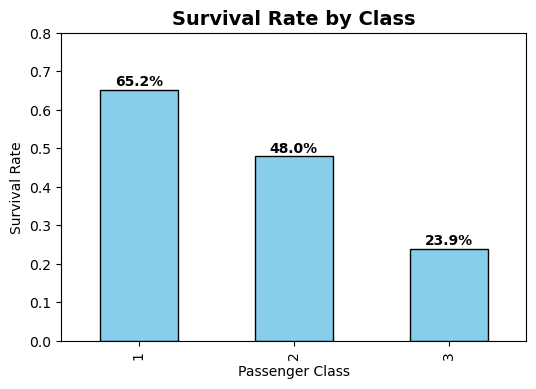

In [21]:
# Visualization of survival rate by class
# Bar chart

# Bar plot: Survival Rate by Passenger Class
plot_class = survival_rate_by_class.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black',
    figsize=(6,4)
)

# Add percentage labels above each bar
for i, v in enumerate(survival_rate_by_class):
    plot_class.text(i, v + 0.01, f"{v:.1%}", ha='center', fontweight='bold')

# Add chart title, axis labels, and y-axis limits
plt.title('Survival Rate by Class', fontsize=14, fontweight='bold')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 0.8)
plt.show()

### Graph 2. Survival Rate by Gender

We can observe a significant gap in the survival rate between women and men.  
The survival rate for **women is around 75%**, while for **men it drops to about 20%**.  
This cultural pattern can be explained by the fact that women were generally prioritized for rescue and assistance.  

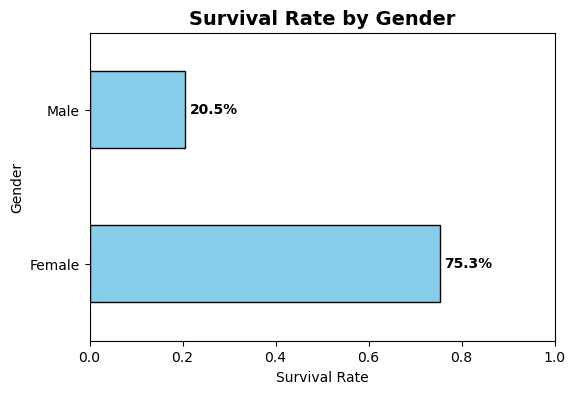

In [22]:
# Visualization of survival rate by gender
# Horizontal bar chart

# Horizontal Bar Chart: Survival Rate by Gender
plot_gender = survival_rate_by_gender.plot(
    kind='barh',
    color='skyblue',
    edgecolor='black',
    figsize=(6,4)
)

# Add labels to the right of each bar with exact values
for i, v in enumerate(survival_rate_by_gender):
    plot_gender.text(v + 0.01, i, f"{v:.1%}", va='center', fontweight='bold')

# Replace x-tick labels with Female/Male for clarity
gender_labels = {0: "Female", 1: "Male"}
plot_gender.set_yticklabels([gender_labels[g] for g in survival_rate_by_gender.index])

# Customize chart
plt.title('Survival Rate by Gender', fontsize=14, fontweight='bold')
plt.ylabel('Gender')
plt.xlabel('Survival Rate')
plt.xlim(0, 1)
plt.show()

### Graph 3. Survival Rate by Family Size

This visualization shows a not-so-intuitive result: the survival rate increases as family size grows from 1 to 4 members, but then decreases significantly for families with 5 or more members.  
The case of families with **4 members stands out, reaching a 77% survival rate**, which is remarkably high compared to the other groups.  

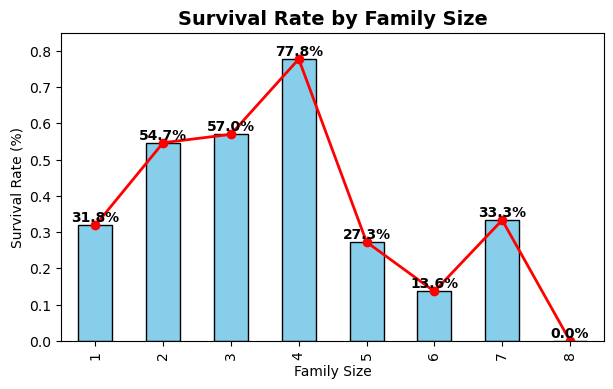

In [23]:
# Visualization of survival rate by family size
# Bar chart with line overlay

# Create a figure and axis for the plot
fig, plot_family = plt.subplots(figsize=(7,4))

# Bar plot: survival rate by family size
survival_rate_by_family_size.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black',
    ax=plot_family
)

# Overlay red line with circular markers showing survival trend by family size
plot_family.plot(
    range(len(survival_rate_by_family_size)),
    survival_rate_by_family_size,
    color='red',
    marker='o',
    linewidth=2
)

# Add percentage labels above each bar
for i, v in enumerate(survival_rate_by_family_size):
    plot_family.text(i, v + 0.01, f"{v:.1%}", ha='center', fontweight='bold')

# Customize chart
plt.title('Survival Rate by Family Size', fontsize=14, fontweight='bold')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 0.85)  # Scale from 0% to 85%
plt.show()

### Graph 4. Survival Rate by Age Group

We observe a high survival rate for passengers between **0 and 18 years old**.  
Interestingly, the survival rate for the **19–30 group** is lower than that of the **31–45** and **46–60** groups, which might initially suggest that younger adults were not prioritized as much as expected.  
Passengers over **60 years old** had a very low probability of survival.  

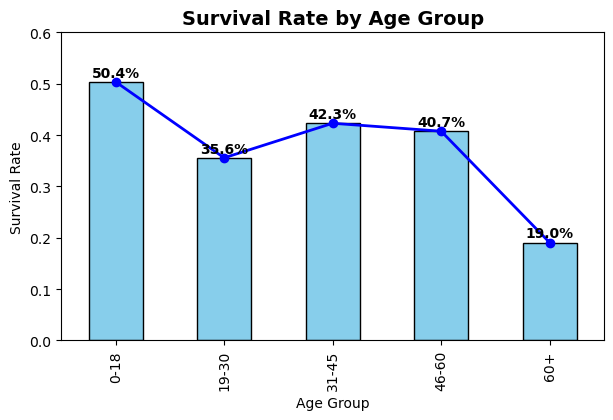

In [24]:
# Visualization of survival rate by age group
# Bar chart with trend line

# Create figure and axis
fig_2, plot_age = plt.subplots(figsize=(7,4))

# Bar plot
survival_rate_by_age.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black',
    ax=plot_age
)

# Add trend line with markers
plot_age.plot(
    range(len(survival_rate_by_age)),
    survival_rate_by_age,
    color='blue',
    marker='o',
    linewidth=2
)

# Add percentage labels above each bar
for i, v in enumerate(survival_rate_by_age):
    plot_age.text(i, v + 0.01, f"{v:.1%}", ha='center', fontweight='bold')

# Customize chart
plt.title('Survival Rate by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0, 0.6)
plt.show()

### Graph 5. Survival Rate by Port of Embarkation

We observe a much higher survival rate for passengers who embarked at **Cherbourg**, followed by **Southampton**, and lastly **Queenstown**.  
This could be related to the passengers’ accommodations within the ship or other unknown factors.  

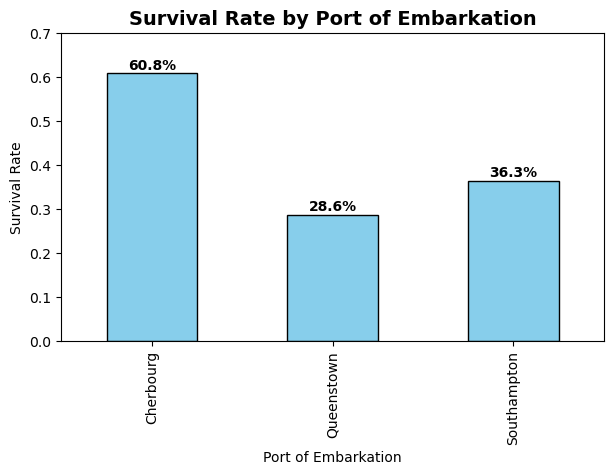

In [25]:
# Bar chart: Survival Rate by Port of Embarkation

plot_embarked = survival_rate_by_embarkation.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black',
    figsize=(7,4)
)

# Add percentage labels above each bar
for i, v in enumerate(survival_rate_by_embarkation):
    plot_embarked.text(i, v + 0.01, f"{v:.1%}", ha='center', fontweight='bold')

# Replace x-axis labels with port names
port_labels = {1: "Cherbourg", 2: "Queenstown", 3: "Southampton"}
plot_embarked.set_xticklabels([port_labels[p] for p in survival_rate_by_embarkation.index])

# Customize chart
plt.title('Survival Rate by Port of Embarkation', fontsize=14, fontweight='bold')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.ylim(0, 0.7)
plt.show()

### Graph 6. Outliers in Age

We observe that most passengers were around **28 years old**, indicating a relatively young average age.  
There are some outliers (above the upper limit) representing very elderly passengers, around **70 to 80 years old**.  
These outliers can still be considered valid, as they do not represent unrealistic values.  

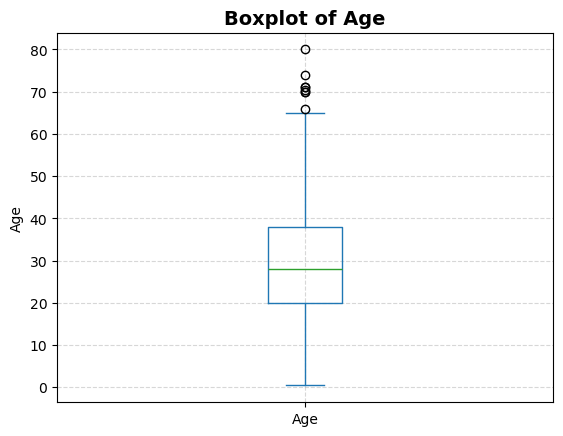

In [26]:
# Visualization of outliers in age - Boxplot
df_without_nulls["Age"].plot(kind='box')

plt.title('Boxplot of Age', fontsize=14, fontweight='bold')
plt.ylabel('Age')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Part 5. Conclusions

The analysis of the Titanic passenger data reveals clear and consistent patterns regarding the factors that determined survival in the shipwreck.  
Below are the key results, divided into the **most impactful factors** and the **unexpected or non-intuitive findings** that emerged from the analysis.  

#### **Factors with the Greatest Impact on Survival**

These are the factors that showed the strongest and most direct correlation with a passenger’s likelihood of survival:

1. **Gender:** Being female was the most significant predictor of survival. With a survival rate of **75.3% for women** compared to only **20.5% for men**, the data strongly confirms the social rule of *“women and children first”* during evacuation.  
   The difference of more than 50 percentage points makes gender the single most decisive factor.

2. **Socioeconomic Class (Pclass):** Socioeconomic status, represented by ticket class, played a crucial role. First-class passengers had a **65% survival rate**, significantly higher than second-class and dramatically higher than third-class, which had only **24%**.  
   This disparity suggests that passengers with more expensive tickets had prioritized access to lifeboats, possibly due to their cabin locations being closer to the upper decks.

3. **Age:** Age was another key determinant, with younger passengers being prioritized. The **0–18 age group** had the highest survival rate among age categories (**50.4%**). In contrast, passengers over **60 years old** had a very low probability of survival, reinforcing the notion that rescue efforts focused on children and younger individuals.

#### **Unexpected Findings**

In addition to the predictable factors, the analysis revealed counterintuitive results that provide a deeper insight into the dynamics on board:

1. **The Family Size Sweet Spot:** Contrary to the assumption that traveling alone or in very large groups was the most disadvantageous, a non-linear pattern emerged. Survival rates increased with family size until peaking in families of **4 members**, who achieved a remarkable survival rate of **77.8%**, the highest of any category analyzed.  
   Beyond 5 members, the likelihood of survival decreased sharply. This may suggest that small families (2 to 4 members) could coordinate and support each other effectively, while individuals traveling alone lacked support, and very large families faced difficulties staying together amidst the chaos.

2. **The Survival Gap Among Young Adults:** Although children were prioritized, the **19–30 age group** displayed a lower survival rate than the **31–45** and **46–60** groups.  
   This finding is unexpected, as one might assume that young, physically capable adults would have higher chances. A possible explanation is that this demographic was largely composed of lower-class males traveling alone, who were among the last to be considered for evacuation.

3. **The Influence of Port of Embarkation:** Passengers who boarded at **Cherbourg (France)** had a survival rate of **60.8%**, noticeably higher than those who boarded at Southampton or Queenstown.  
   While cabin location may have played a role, it is also likely that this outcome correlates with other high-impact factors—such as a larger proportion of first-class passengers embarking from Cherbourg.